## Quantium Task 1

In [1]:
## Importng Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
customer = pd.read_csv(r"C:\Users\user\Downloads\Quantium\QVI_purchase_behaviour.csv")
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
#load the dataset
transaction = pd.read_excel(r"C:\Users\user\Downloads\Quantium\QVI_transaction_data.xlsx")
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## Checking Data Types

In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## Summarization

In [6]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [7]:
#Checking null values
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

## Finding and Treating Outliers

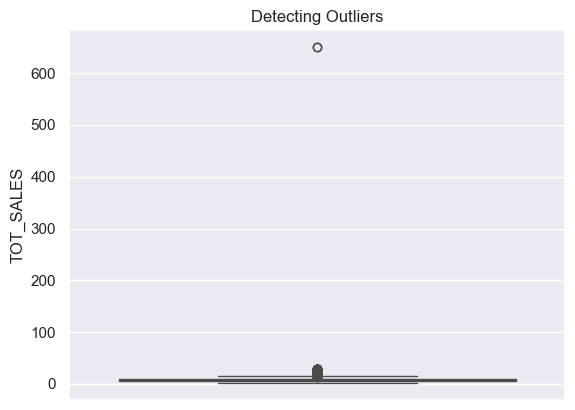

In [8]:
# Ploting a boxplot to detect outliers in sales
sns.set(style = 'darkgrid')
sns.boxplot(transaction['TOT_SALES'])
plt.title('Detecting Outliers')
plt.show()

In [9]:
# Use IQR Methodd to treat outliers
q1,q3 = np.percentile((transaction['TOT_SALES']),[25,75])
iqr = q3-q1
print(f"first Quartile: {q1}")
print(f"second Quartile: {q3}")
print(f"inter Quartile Range: {iqr}")

first Quartile: 5.4
second Quartile: 9.2
inter Quartile Range: 3.799999999999999


In [10]:
# Calculating upper and lower bound so that any datapoints higher than upper bound and lower than lower bound will be callled as outliers
upper_bound = q3 + (iqr * 1.5)
lower_bound = q1 - (iqr * 1.5)
print(f"upper_bound: {upper_bound}, lower_bound: {lower_bound}")

upper_bound: 14.899999999999999, lower_bound: -0.29999999999999805


In [11]:
# capping outliers
transaction['TOT_SALES'] = transaction['TOT_SALES'].apply(lambda x: np.where(x > upper_bound, upper_bound,x))

In [12]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,14.9
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


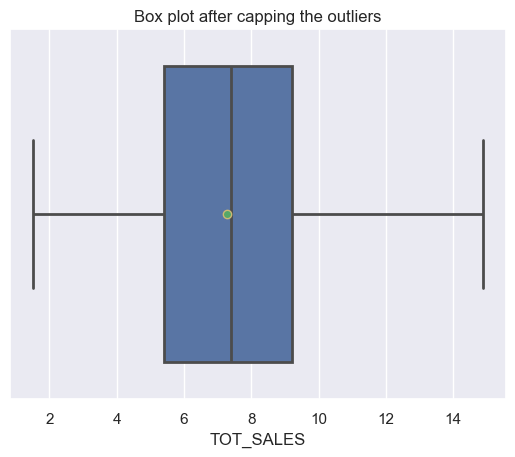

In [13]:
# final outplot
sns.set(style = 'darkgrid')
sns.boxplot(x= transaction['TOT_SALES'],showmeans= True, linewidth= 2, meanprops= {'marker': 'o', 'markeredgecolor' : 'y'})
plt.title('Box plot after capping the outliers')
plt.show()

In [17]:
transaction['PROD_QTY'].unique()

array([2., 3., 5., 1., 4.])

In [16]:
median_qty = transaction['PROD_QTY'].median()
transaction['PROD_QTY'] = transaction['PROD_QTY'].apply(lambda x: x if x<=5 else median_qty)

In [18]:
transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3.0,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,14.9
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2.0,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1.0,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2.0,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2.0,7.8


* Now, we are able to treat outliers successfully and can see there is no outliers in Sales column.

In [19]:
# separate pack size from product name
transaction['PACK_SIZE'] = transaction['PROD_NAME'].str.extract('(\d+)')

In [20]:
transaction['PACK_SIZE'].unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', '90', '70'], dtype=object)

## Merging two tables

In [21]:
New_dataset = pd.merge(transaction, customer, on = 'LYLTY_CARD_NBR').sort_values(by = 'TXN_ID', ascending = True)

In [22]:
New_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2.0,6.0,175,YOUNG SINGLES/COUPLES,Premium
240665,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150,YOUNG SINGLES/COUPLES,Mainstream
188932,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1.0,3.6,210,YOUNG FAMILIES,Budget
188933,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175,YOUNG FAMILIES,Budget
102787,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1.0,1.9,160,OLDER SINGLES/COUPLES,Mainstream


## Visualization

* Customer Segmentation

In [23]:
# Total customers in each spending pattern group
segmentation= New_dataset['PREMIUM_CUSTOMER'].value_counts()
segmentation

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69691
Name: count, dtype: int64

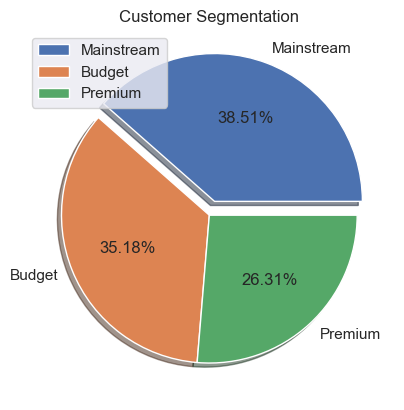

In [24]:
# Create plot
plt.pie(segmentation, labels= segmentation.index, shadow= True, explode= [0.1,0.0,0.0], autopct='%1.02f%%')
plt.legend(loc= 'best')
plt.title('Customer Segmentation')
plt.show()

*  Average Spend per customers by LIFESTAGE and PREMIUM_CUSTOMER

In [30]:
Total_sales = New_dataset.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
Total_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35473.10
1,MIDAGE SINGLES/COUPLES,Mainstream,90640.10
2,MIDAGE SINGLES/COUPLES,Premium,58348.85
3,NEW FAMILIES,Budget,21906.95
4,NEW FAMILIES,Mainstream,16999.95
5,NEW FAMILIES,Premium,11480.30
6,OLDER FAMILIES,Budget,168048.35
7,OLDER FAMILIES,Mainstream,103264.80
8,OLDER FAMILIES,Premium,80569.10
9,OLDER SINGLES/COUPLES,Budget,136544.30


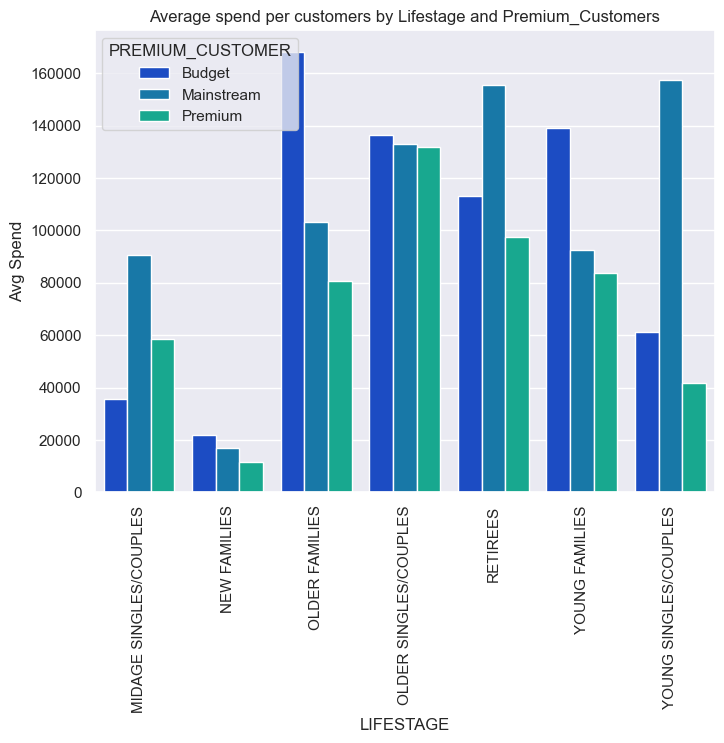

In [26]:
# Create plot
sns.set(style= 'darkgrid')
plt.figure(figsize= [8,6])
sns.barplot(x= 'LIFESTAGE', y= 'TOT_SALES', hue= 'PREMIUM_CUSTOMER', data= Total_sales, palette= 'winter')
plt.title('Average spend per customers by Lifestage and Premium_Customers')
plt.ylabel('Avg Spend')
plt.xticks(rotation= 90)
plt.show()

*  Total number of units bought per customers by LIFESTAGE and PREMIUM_CUSTOMER

In [27]:
Total_units = New_dataset.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
Total_units

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,9496.0
1,MIDAGE SINGLES/COUPLES,Mainstream,22699.0
2,MIDAGE SINGLES/COUPLES,Premium,15526.0
3,NEW FAMILIES,Budget,5571.0
4,NEW FAMILIES,Mainstream,4319.0
5,NEW FAMILIES,Premium,2957.0
6,OLDER FAMILIES,Budget,45065.0
7,OLDER FAMILIES,Mainstream,27756.0
8,OLDER FAMILIES,Premium,21775.0
9,OLDER SINGLES/COUPLES,Budget,35220.0


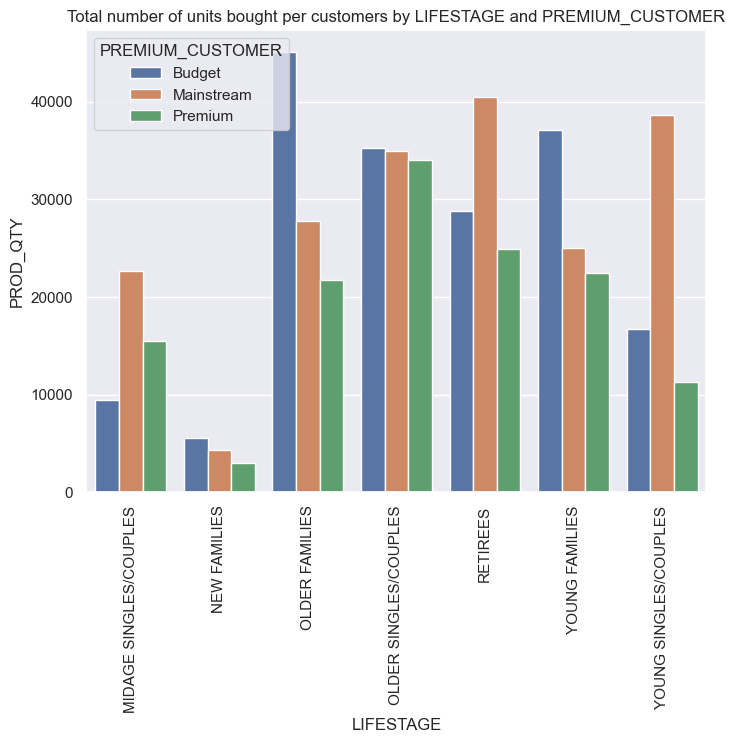

In [28]:
# Create plot
sns.set(style= 'darkgrid')
plt.figure(figsize= [8,6])
sns.barplot(x= Total_units['LIFESTAGE'], y= Total_units['PROD_QTY'], hue= Total_units['PREMIUM_CUSTOMER'])
plt.title('Total number of units bought per customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xticks(rotation= 90)
plt.show()